In [2]:
import pandas as pd
import os
import gzip
import pickle

# category = "groupbuys"
category = "hardware"
# category = "miners"
# category = "mining"
# category = "mining_support"
# category = "pools"

# category = "mining_speculation"

with gzip.open('cleaned-data/'+category+'.pkl.gz', 'rb') as f:
    df = pickle.load(f)

In [3]:
categories = [
    "groupbuys",
    "hardware",
    "miners",
    "mining",
    "mining_support",
    "pools",
    "mining_speculation"
]

total_threads = 0
total_chars = 0
total_posts_global = 0
all_dates = []
for cat in categories:
    with gzip.open('cleaned-data/'+cat+'.pkl.gz', 'rb') as f:
        df_ = pickle.load(f)
    # print(cat, "number of threads: ", len(df))
    # print(cat, "average characters per threads: ", df['post'].str.len().mean())
    # print(cat, "median characters per threads: ", df['post'].str.len().median())
    # print(cat, "max characters in a thread: ", df['post'].str.len().max())
    # print(cat, "total characters in the category ", cat, ": ", df_['post'].str.len().sum())
    
    # total_threads += len(df_)
    # total_chars += df_['post'].str.len().sum()

    total_threads += len(df_)
    total_posts = 0
    for (id,row) in df_.iterrows():
        for post in row["post"].split("<sep>"):
            total_chars += len(post)
            total_posts += 1

        for date in row["dates"].split("<sep>"):
            all_dates.append(date[:7])
            break

    # print(cat, "average characters per post in the thread: " , total_chars/total_posts)
    print("total posts in the category", cat, ":", total_posts)
    total_posts_global += total_posts


print("total threads: ", total_threads)
print("total characters: ", total_chars)
print("total posts: ", total_posts_global)

total posts in the category groupbuys : 80095
total posts in the category hardware : 349144
total posts in the category miners : 60831
total posts in the category mining : 39236
total posts in the category mining_support : 58811
total posts in the category pools : 209797
total posts in the category mining_speculation : 63863
total threads:  32948
total characters:  273954272
total posts:  861777


In [4]:
# #print a sample
# for (id,row) in df.tail(50).iterrows():
#     if(len(row["post"]) < 100):
#         continue
#     print("id:", id)
#     print("topic:", row["topic"])
#     print("posts:")
#     for (post, date) in zip(row["post"].split("<sep>"), row["dates"].split("<sep>")):
#         # print("date:", date[:10])
#         print("date:", date)
#         if (post.count("[") > 3) and len(post) > 1000:
#             print("<truncated this post as it contains a long error message>")
#             print(post)
#         else:
#             print(post)
#         print("---")
#     print("\n\n\n\n\n")

In [5]:
#sort all_dates
all_dates.sort()
all_dates

['2010-09',
 '2010-10',
 '2010-11',
 '2010-11',
 '2010-11',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2010-12',
 '2011-01',
 '2011-01',
 '2011-01',
 '2011-01',
 '2011-01',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '20

<AxesSubplot: >

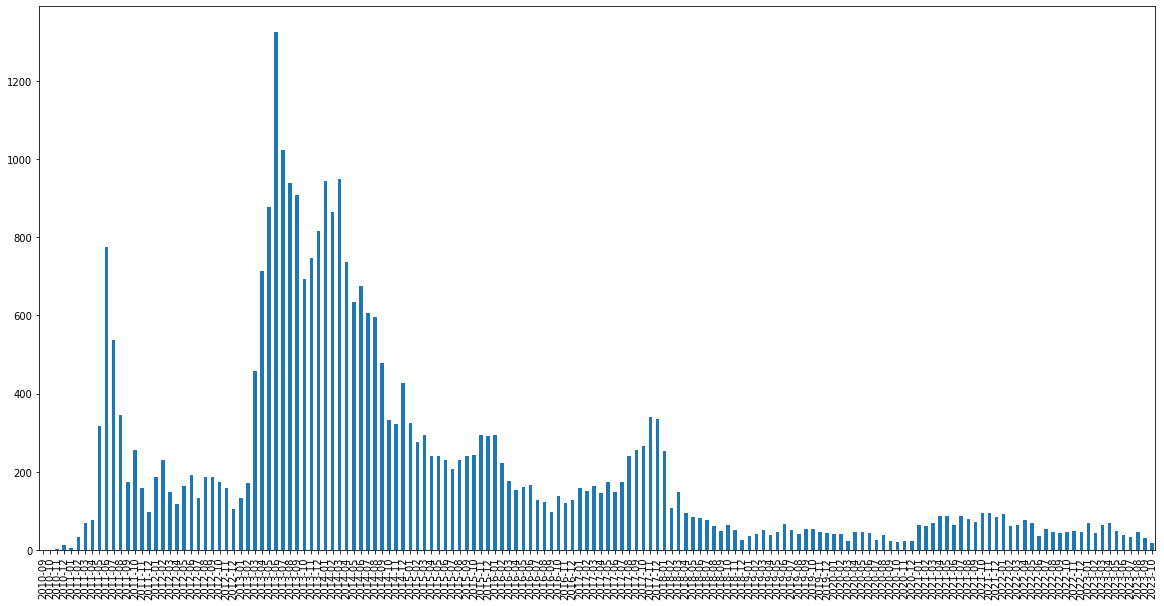

In [6]:
# df["month"] = df["dates"].apply(lambda x: x.split("<sep>")[0][:7])
# #plot distribution of months in threads
# df["month"].value_counts().sort_index().plot(kind="bar", figsize=(20,10))

import matplotlib.pyplot as plt
# plot all_dates with a bar plot
plt.figure(figsize=(20,10))
value_counts = pd.Series(all_dates).value_counts().sort_index()
value_counts.plot(kind="bar")

In [13]:
all_dates = pd.DataFrame(all_dates)
# count dates after 2014
print(all_dates[all_dates[0] > "2015-01"].value_counts().sum())
# count dates after 2018
print(all_dates[all_dates[0] > "2018-01"].value_counts().sum())

11403
3899
